***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [198]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [199]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [200]:
display(dados.head(), dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


None

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [201]:

bins = [0, 1576.0, 3940.0,  11820.0,  19700.0, 200000]
dados.Renda.max()

200000

### 2º Definir os labels das classes

In [202]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [203]:
frequencia = pd.cut(
    x = dados.Renda,
    bins = bins,
    labels= labels,
    include_lowest=True
)
frequencia = frequencia.value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [204]:

percentual = pd.cut(
    x = dados.Renda,
    bins=bins,
    labels=labels,
    include_lowest=True,

)
percentual = percentual.value_counts(normalize=True) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [205]:
dist_frequencia_renda = pd.DataFrame({

        'Frequencia':frequencia,
        'Percentual(%)':percentual
    }
)
dist_frequencia_renda.reset_index()

,index,Frequencia,Percentual(%)
0,E,49755,64.751432
1,D,18602,24.208745
2,C,7241,9.423477
3,B,822,1.069755
4,A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/tmp/ipykernel_8988/3901689353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dist_frequencia_renda)


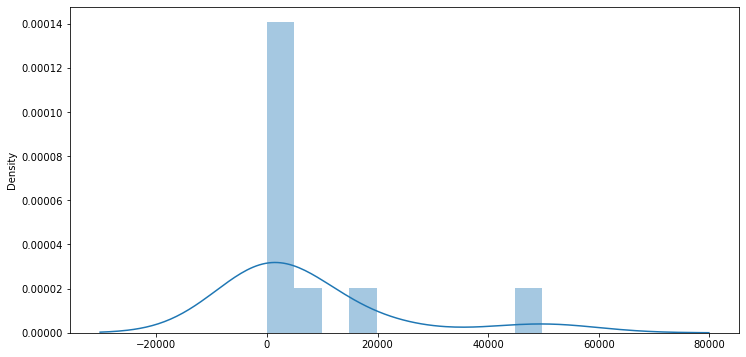

In [206]:
ax = sns.distplot(dist_frequencia_renda)
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Escreva suas conclusões aqui...
<h3>Conclusão:</h3>
<p> Dado a distribuição da porcentagem, e possível notar que a maiora ganha muito pouco se comparado com a minoria na classe <b>A</b>, e que a maoir parte das pessoas estão na classe <b>E</b>.
</p>

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

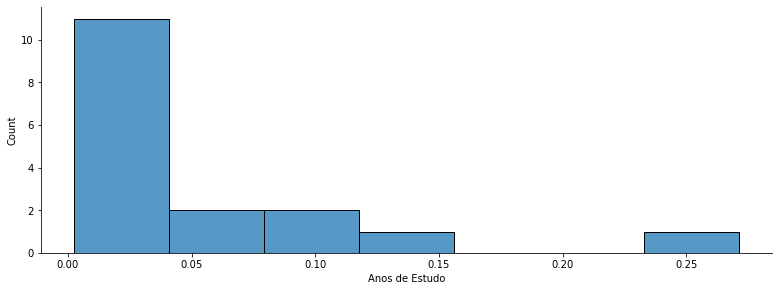

In [207]:
dados_anosestudo = dados['Anos de Estudo']

n = len(dados_anosestudo)
k = 1 + (10/3) * np.log10(n)
k  = int(k)
hist_anos_estudo = pd.cut(
    x=dados_anosestudo,
    bins=k
)
ax = sns.displot(hist_anos_estudo.value_counts(normalize=True))
ax.figure.set_size_inches(12, 4)


/tmp/ipykernel_8988/601493872.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(hist_altura, bins=10)


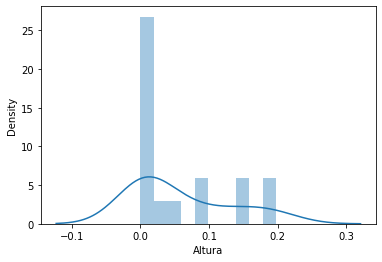

In [209]:
dados_altura = dados['Altura']
n = len(dados_altura)
k = int(1 + (10/3) * np.log10(n))
hist_altura = pd.cut(
    x=dados_altura,
    bins=k
)
hist_altura = hist_altura.value_counts(normalize=True)
ax = sns.distplot(hist_altura, bins=10)


/tmp/ipykernel_8988/539705061.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(hist_renda)


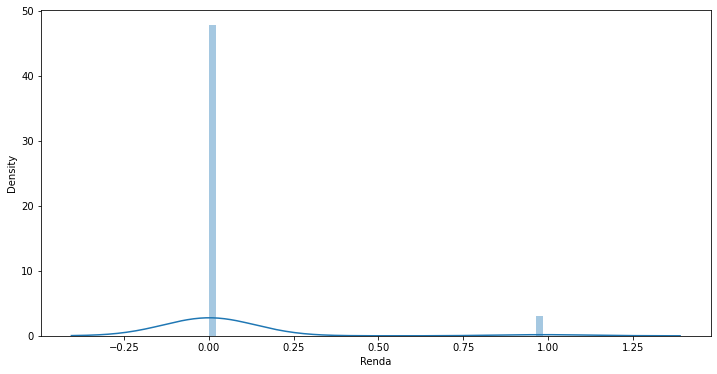

In [208]:
dados_renda = dados['Renda']

n = len(dados_renda)
k = 1 + (10/3) * np.log10(n)
k  = int(k)
hist_renda = pd.cut(
    x=dados_renda,
    bins=k
)
hist_renda = hist_renda.value_counts(normalize=True)
ax = sns.distplot(hist_renda)
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Escreva suas conclusões aqui...
<h3>Conclusão:</h3>
<p> Em  todos os casos existe um classe mais povoada, em relação as outras, conferindo assim uma media nesse sentido, um padrao, visível.
</p>

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/tmp/ipykernel_8988/1547561534.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(hist_renda)


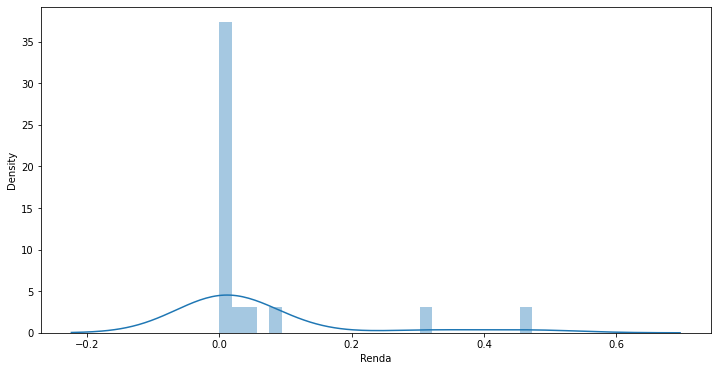

In [210]:
filtro = dados['Renda'] < 20000
renda_sem_20000 = dados[filtro]['Renda']
renda_sem_20000
dados_renda = renda_sem_20000
n = len(dados_renda)
k = 1 + (10/3) * np.log10(n)
k  = int(k)
hist_renda = pd.cut(
    x=dados_renda,
    bins=k
)
hist_renda = hist_renda.value_counts(normalize=True)
ax = sns.distplot(hist_renda)
ax.figure.set_size_inches(12, 6)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [211]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [212]:
def renomear(data, coluna, dict):
    lista_local = []
    for x in data[coluna]:
        lista_local.append(dict[x])
    data[coluna] = lista_local
renomear(dados, 'UF', uf)


In [213]:
renomear(dados, 'Sexo', sexo)
renomear(dados, 'Cor',cor)
renomear(dados, 'Anos de Estudo', anos_de_estudo)

> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [215]:
media = dados.Renda.mean()

### Obtenha a mediana

In [216]:
mediana = dados.Renda.median()

### Obtenha a moda

In [217]:
moda = dados.Renda.mode()

### Obtenha o desvio médio absoluto

In [218]:
moda = dados.Renda.mad()

/tmp/ipykernel_8988/3572731825.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  moda = dados.Renda.mad()


### Obtenha a variância

In [219]:
variancia = dados.Renda.var()

### Obtenha o desvio-padrão

In [220]:
std = dados.Renda.std()

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [221]:
data = dados[['Renda', 'Cor']]
data.head()
data.groupby('Cor').agg(['mean', 'median', 'max'])


Renda                
                 mean  median     max
Cor                                  
Amarela   4182.920455  2450.0   50000
Branca    2679.019331  1500.0  200000
Indígena  1472.887955   788.0  120000
Parda     1513.596103  1000.0  100000
Preta     1442.294840  1000.0   50000

> ### Conclusões

Escreva suas conclusões aqui...

Tendo em vista a ultima tabela, a cor de pele com a maior média e a amarela, porem a maior maxima e da branca, ja a indigena tem a mediana mais baixa,  e a preta tem a menor maxima, e menor média.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [225]:
dados_sexo = dados[['Sexo', 'Renda']]

pd.crosstab(
    dados['Sexo'],
    dados['Cor'],
    aggfunc=['mad','var', 'std'],
    values=dados_sexo.Renda
    
)

/tmp/ipykernel_8988/229382681.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(
/tmp/ipykernel_8988/229382681.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(
/tmp/ipykernel_8988/229382681.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(
/tmp/ipykernel_8988/229382681.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(
/tmp/ipykernel_8988/229382681.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may d

mad                                                     \
Cor            Amarela       Branca     Indígena        Parda       Preta   
Sexo                                                                        
Feminino   2549.146322  1670.967106  3007.892952   811.580946  705.453357   
Masculino  3709.597211  2261.012346   798.910889  1125.827704  975.602482   

                    var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                                std                                          \
Cor               Preta     Amarela       Branca      Indígena        Parda   
Sexo                                                                          
Feminino   1.821960e+06  3731.17366  3251.013154  11957.498292  1596.233048   
Masculino  3.749294e+06  5740.82482  4750.791872   1204.093490  2312.087184   

                        
Cor              Preta  
Sexo                    
Feminino   1349.799809  
Masculino  1936.309271

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

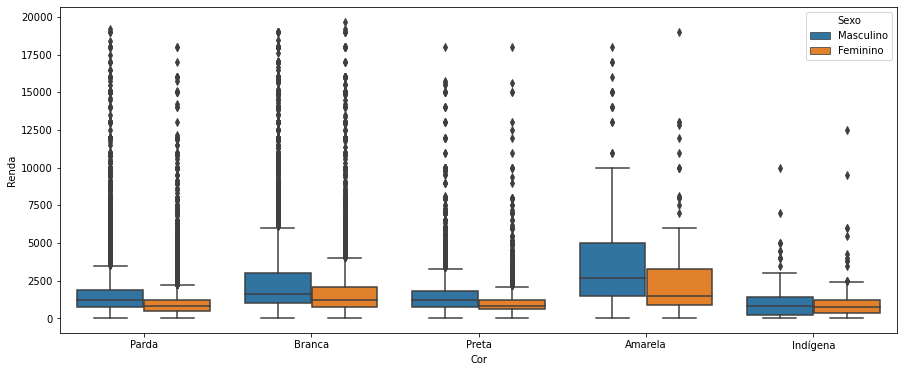

In [233]:
ax = sns.boxplot(data=dados.query('Renda < 20000'), x='Cor', y='Renda', hue='Sexo')
ax.figure.set_size_inches(15, 6)

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [256]:
from scipy import stats
array = data.Renda.to_numpy()
stats.percentileofscore(data.Renda, 788.00, kind='rank')


24.390942217595004

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [258]:
dados.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [263]:
pd.crosstab(
    dados['Anos de Estudo'],
    dados['Sexo'],
    values=dados.Renda,
    aggfunc=['mean', 'median', 'max', 'std']


)

mean                median            \
Sexo                               Feminino    Masculino Feminino Masculino   
Anos de Estudo                                                                
1 ano                            492.771987   895.629047      400       788   
10 anos                          925.919225  1731.270847      800      1218   
11 anos                         1286.790889  2117.060504     1000      1500   
12 anos                         1682.313725  2470.330776     1200      1800   
13 anos                         1911.730047  3195.099154     1300      2400   
14 anos                         2226.460457  3706.620269     1600      2500   
15 anos ou mais                 3899.513231  6134.279790     2800      4000   
2 anos                           529.911638   931.178986      450       788   
3 anos                           546.853916  1109.203862      500       800   
4 anos                           704.279111  1302.329283      788      1000   
5 anos                           781.389776  1338.653218      788      1045   
6 anos                           833.732824  1448.875419      788      1200   
7 anos                           830.751004  1465.497940      788      1200   
8 anos                           933.615351  1639.396667      800      1300   
9 anos                           868.021700  1508.038850      788      1200   
Não determinados                 798.174419  1295.761905      788      1200   
Sem instrução e menos de 1 ano   516.201748   799.494638      390       700   

                                    max                    std               
Sexo                           Feminino Masculino     Feminino    Masculino  
Anos de Estudo                                                               
1 ano                              2000     30000   425.291842  1331.950552  
10 anos                            6000     45000   620.611907  2078.609734  
11 anos                          100000    200000  1819.040417  2676.538942  
12 anos                          120000     30000  4851.833513  2268.081538  
13 anos                           20000     25000  2053.789771  2797.116800  
14 anos                           20000     50000  2064.083336  3987.214974  
15 anos ou mais                  100000    200000  4212.770709  7447.613594  
2 anos                             4000     40000   498.234168  1435.173827  
3 anos                             3500     80000   424.124446  2143.800133  
4 anos                            10000     50000   629.553397  1419.821787  
5 anos                             8000     35000   635.782641  1484.650587  
6 anos                             6000     25000   574.547028  1476.628602  
7 anos                             9000     40000   602.038029  1419.708673  
8 anos                            18000     30000   896.781213  1515.583715  
9 anos                            20000     60000   973.221652  2137.664774  
Não determinados                   3000      7000   459.985964   979.648745  
Sem instrução e menos de 1 ano    10000     30000   639.311534  1023.904884

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...